# PCA for image
- - - - - 
## What we learned 
- - - - 
~ Learn how to use the SVD for analysising image.

~ How to flatten the image by the scipy function imread

~ Applied the PCA to the single image and get the image for different dimensions

## About the image
- - - - - - - - - - - - - 
Before we talk about the PCA, there is somthing new about image u need to know. All the image can be transferred to a numerical matrix. Then, you might ask will the image has those numerical attributes? YES! All the image has the attributes such as dimention; each color in the image represents a dimention such that applied PCA on the image basically means that we eliminate the color in the image. Of course, color here does not mean those general color like red, green, blue, but more particularly.

## SVD (singular value decomposition)
- - - -- -- - - - 
SVD is a main technique which people used in PCA to reduce the dimension. For any m x n matrix A, we can always possess the SVD to get that 
$$
A = U D V^T
$$
where D is a diagonal matrix and both of U and V are the orthogonal matrix. 

Further more, if we look at the all the entries $\gamma$ in side the diagonal matrix, all those entries are in the nonincreasing order such that $\gamma_1 \ge \gamma_2 \ge ...\ge \gamma_m$ and each entirs represents single dimension. Meanwhile, this order tolds us which entry is the weakest, such that we can eliminate the dimension by set the value of those entries as zero.

Then, all we need to do is just transfer the image into matrix.

Now lets us modify the fancy Einstein's photos (1583 x 2048). Since the image are grey such that the size of image will be 

In [18]:
1583 * 2048* 8

25935872

C:\Users\dongl4\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()


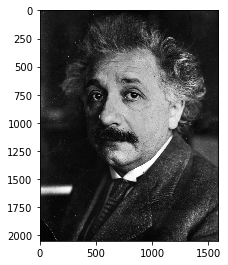

In [17]:
# importing
from scipy.ndimage import imread
import numpy as np
import sympy as sp 
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.fft import *
from numpy.linalg import *

# show the original 
x = np.arange(0.0,1500,1.0)
y = np.arange(0.0,800,1.0)
X,Y = np.meshgrid(x, y)


img = imread("./einstein.jpg", mode = "L") 
fig0 = plt.figure()
axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
axes0.imshow(img,  cmap = 'gray')


And we transfer the image into a variable called img 

In [2]:
img

array([[49, 49, 48, ..., 45, 43, 44],
       [49, 50, 47, ..., 44, 43, 44],
       [51, 49, 48, ..., 44, 45, 44],
       ...,
       [23, 24, 26, ..., 61, 61, 61],
       [22, 23, 25, ..., 62, 63, 61],
       [24, 23, 24, ..., 57, 57, 55]], dtype=uint8)

Now, lets us apply SVD to the matrix by using the 2 function `compress_img` and `rest_img`. The `compress_img` will compress the whole matrix into k dimension while the `rest_img` give us the matrix of the elimination part.

In [20]:
from numpy.linalg import svd
def compress_img(img, k):
    """
    use the svd decomposition on the single image to eliminate the 
    useless part and then reconstrust the whole matrix for our image 
    """
    U,s,V= svd(img,full_matrices = False)
    recreate = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))

    return recreate ,s
def rest_img(img, k):
    """
    This is what we elimnated in compress_img
    """
    U,s,V= svd(img,full_matrices = False)
    recreate = np.dot(U[:,k:],np.dot(np.diag(s[k:]),V[k:,:]))

    return recreate ,s

For the first example, we use the original dimension 2048 as the k so we suppose to get a same image as the original one.

In [21]:
img_01,s = compress_img(img,2048)
img_01

array([[49., 49., 48., ..., 45., 43., 44.],
       [49., 50., 47., ..., 44., 43., 44.],
       [51., 49., 48., ..., 44., 45., 44.],
       ...,
       [23., 24., 26., ..., 61., 61., 61.],
       [22., 23., 25., ..., 62., 63., 61.],
       [24., 23., 24., ..., 57., 57., 55.]])

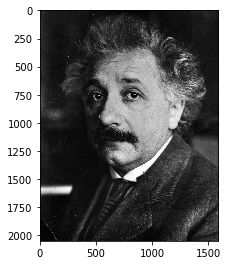

In [22]:
#plot this image 
fig01=plt.figure()
axes01 = fig01.add_axes([0.1,0.1,0.8,0.8])
axes01.imshow(img_01,  cmap = 'gray')


The image looks same, but we can still use the elimination part to have a check

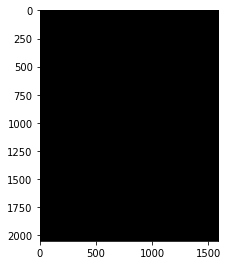

In [23]:
# plot the rest 

img_03,s03 = rest_img(img,2048)
fig03 =plt.figure()
axes03 = fig03.add_axes([0.1,0.1,0.8,0.8])
axes03.imshow(img_03, cmap = "gray")

Elimination part looks balck which means our function works!!!!, Then lets plot the value s to see how each dimension affect the whole image.Note that the y-axis is in decibels after using the equation 10log_{10}(singular value)

In [6]:
s

array([1.50617031e+05, 2.96268511e+04, 2.43929492e+04, ...,
       7.21762130e+00, 7.08009149e+00, 6.80818934e+00])

Text(0,0.5,'Normalized eigenvalue (db)')

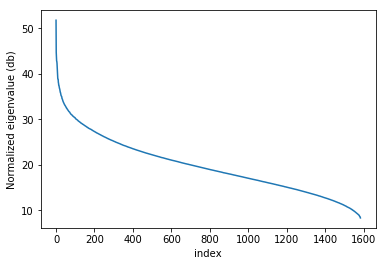

In [7]:
# make a 2-d plot for the s 
fig_s = plt.figure()
axes_s = plt.axes()
x= np.linspace(0,1583,1583)
db = 10* np.log10(s)
axes_s.plot(x, db)
plt.xlabel("index")
plt.ylabel("Normalized eigenvalue (db)")

From the plot we can easily see that value of eigenvalue decrease after the first 30-40 values which means the value of the information in the following entries is decreasing. Those values are more like noies.

Then we compress the dimention into 40

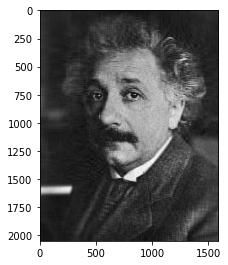

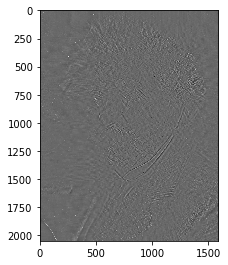

In [26]:
# plot the image with 40 singular value 
img_02,s2 =compress_img(img,40)
fig02 =plt.figure()
axes02 = fig02.add_axes([0.1,0.1,0.8,0.8])
axes02.imshow(img_02, cmap = "gray")
# plot the rest 
img_04,s4 = rest_img(img,40)
fig04 =plt.figure()
axes04 = fig04.add_axes([0.1,0.1,0.8,0.8])
axes04.imshow(img_04, cmap = "gray")

Even though the first image looks like same, but we can figure out that there is something in the second image -- outline of einstein ! Other than that, by using this tech, we can save our storage such that this image was only 145280 bytes which is 0.56% of the original one.

In [27]:
1583*40+40+40*2048

145280

To give a intuitive look on eliminating, we made another image with only 20 dimensions. 

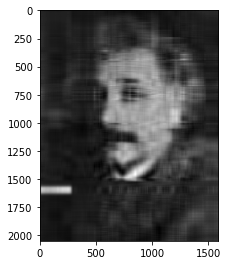

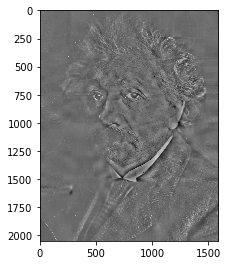

In [28]:
# plot the image with 20 singular value 
img_05,s2 =compress_img(img,10)
fig05 =plt.figure()
axes05 = fig05.add_axes([0.1,0.1,0.8,0.8])
axes05.imshow(img_05, cmap = "gray")
# plot the rest 
img_06,s4 = rest_img(img,10)
fig06 =plt.figure()
axes06 = fig06.add_axes([0.1,0.1,0.8,0.8])
axes06.imshow(img_06, cmap = "gray")

Since some of important information has been eliminated, we started to blur the whole image. 

There also have the case that we need to deal with couple instance of the image and we will talk about this in the following part.

## Flatten the image 
- - - -  - - - 
We should undertand all the image in the computer was accually consist of couple data in the array such that we can transfer the image into data and treat it with numerical method. `scipy.ndimage.imread()` can help us to do the transfer. 

In [29]:
# there is pretty simple function called flatten 
flat = img.flatten()
flat

array([49, 49, 48, ..., 57, 57, 55], dtype=uint8)

In [ ]:
len(flat)

## Eigen-face 